# Design a code to predict the absolute magnitude, magnitude for the simulated stellar cluster created by MOSS

*Victor Ramirez Delgado*

## Introduction

From our simulations of MOSS, we have now developed a testcase for our study os surveing magnetic fields in massive stars. We have values for each of these simulated stars, such as:

* Effecttive temperature $T_\mathrm{eff}$ (K)
* Luminosity $L$ ($L_\odot$)
* Surface gravity $g$ 
* Mass $M$ ($M_\odot$)
* Age $t$ (years)
* Magnetic field $B$ (Gauss)

Our goal is to know imagine if we take all of these stars and survey them in search for a magnetic field. What exposure time will we need to detect a magnetic field? We consider that the cluster has a distance of 400 pc. Now we follow the procedure from the spreedsheet of MOBSTER exposure time to compute the quantities in the spreed sheet. We compute the observational limits of the magnetic field for our stellar population of stars from MOSS at an age of 3.4 Million years where we assumed all stars in the population to be magnetic.

## Computing bolometric magnitudes

Since we have information of our stars in $T_\mathrm{eff}$ and $L$ we want to determine their magnitude in order to simulate a real survey. First step consist on computing the bolometric magnitude of the stars from their luminosities using the relation

$$ M_\mathrm{bol} - M_{\mathrm{bol}\odot} = -2.5 \log \left(\frac{L_\star}{L_\odot}\right), $$

where we use $M_{\mathrm{bol}\odot} = 4.74$.

The next code cells read the output files from MOSS to then proceed to calculate their absolute magnitudes

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#make better plots
plt.style.use(['science','notebook','grid'])
plt.rcParams.update({"font.size" : 26})
plt.rcParams.update({"axes.labelsize" : 26})
plt.rcParams.update({"xtick.labelsize" : 22})
plt.rcParams.update({"ytick.labelsize" : 22})
plt.rcParams.update({"axes.titlesize" : 26})
plt.rcParams.update({"figure.figsize": (10,8)})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [10]:
#read the output file from MOSS
name = 'data1_z14mix1_01_3400000.0yrs.txt'
data = pd.read_csv(name, sep='\t', header = 16)
data.columns = data.columns.str.replace(' ', '')
data.head()

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq
0,5,1,12.42519,4682.17932,4.43918,4.07659,0.34466,0.64163,4.07702,0.0,0.68259,3.418219e+06,4.16684,12.42481,164.25360,4106.12009
1,8,1,31.14667,1063.24164,4.56703,5.26824,0.56808,0.41841,5.26859,0.0,1.02271,3.421601e+06,3.88211,31.00078,93.46208,538.15900
2,23,1,5.47245,21111.73518,4.26003,2.86460,0.28129,0.70462,2.86554,0.0,0.43488,3.535660e+06,4.30468,5.47242,57.80317,22962.04516
3,39,1,3.50900,4875.62374,4.12549,2.13813,0.27180,0.71397,2.13948,0.0,0.34074,3.726868e+06,4.29730,3.50899,254.98440,4976.04165
4,40,1,4.41122,1434.38437,4.18744,2.51036,0.27530,0.71052,2.51151,0.0,0.40295,3.601090e+06,4.27407,4.41121,275.21864,1417.77650


In [15]:
data

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq
0,5,1,12.42519,4682.17932,4.43918,4.07659,0.34466,0.64163,4.07702,0.0,0.68259,3.418219e+06,4.16684,12.42481,164.25360,4106.12009
1,8,1,31.14667,1063.24164,4.56703,5.26824,0.56808,0.41841,5.26859,0.0,1.02271,3.421601e+06,3.88211,31.00078,93.46208,538.15900
2,23,1,5.47245,21111.73518,4.26003,2.86460,0.28129,0.70462,2.86554,0.0,0.43488,3.535660e+06,4.30468,5.47242,57.80317,22962.04516
3,39,1,3.50900,4875.62374,4.12549,2.13813,0.27180,0.71397,2.13948,0.0,0.34074,3.726868e+06,4.29730,3.50899,254.98440,4976.04165
4,40,1,4.41122,1434.38437,4.18744,2.51036,0.27530,0.71052,2.51151,0.0,0.40295,3.601090e+06,4.27407,4.41121,275.21864,1417.77650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,156100,1,6.39461,16280.90968,4.29681,3.10357,0.28722,0.69875,3.10439,0.0,0.48083,3.454044e+06,4.28098,6.39457,90.13124,17108.55078
3887,156133,1,3.79140,3159.36211,4.14756,2.26934,0.27275,0.71304,2.27064,0.0,0.36220,3.621914e+06,4.28967,3.79140,262.78304,3189.38951
3888,156146,1,3.05928,1644.13964,4.08528,1.92661,0.27049,0.71526,1.92780,0.0,0.31539,3.522914e+06,4.29181,3.05927,275.28281,1642.02379
3889,156148,1,3.54445,1336.83852,4.12498,2.15265,0.27178,0.71399,2.15387,0.0,0.34903,3.648054e+06,4.28515,3.54444,278.64299,1329.30886


In [12]:
#find any weird stars
data[data['log_Teff']<2]

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq


In [13]:
data[data['log_Teff']< 3.70]

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq
1049,40831,1,15.48052,327.96511,2.8739,2.82307,0.24057,0.39319,2.8233,0.0,0.49723,2.133897e+06,2.62619,10.1162,200.80043,179.66505


In [17]:
#find the one that is out of the HR diagram
data.query("`log_Teff`<4.2 and `log_L`>4.0")

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq
3861,155207,1,15.3282,476.03445,4.18119,4.08044,0.34975,0.57309,4.08079,0.0,0.71603,3.181895e+06,3.82968,14.35968,281.82617,348.89806


In [18]:
data.drop(data.query("`log_Teff`<4.2 and `log_L`>4.0").index)

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq
0,5,1,12.42519,4682.17932,4.43918,4.07659,0.34466,0.64163,4.07702,0.0,0.68259,3.418219e+06,4.16684,12.42481,164.25360,4106.12009
1,8,1,31.14667,1063.24164,4.56703,5.26824,0.56808,0.41841,5.26859,0.0,1.02271,3.421601e+06,3.88211,31.00078,93.46208,538.15900
2,23,1,5.47245,21111.73518,4.26003,2.86460,0.28129,0.70462,2.86554,0.0,0.43488,3.535660e+06,4.30468,5.47242,57.80317,22962.04516
3,39,1,3.50900,4875.62374,4.12549,2.13813,0.27180,0.71397,2.13948,0.0,0.34074,3.726868e+06,4.29730,3.50899,254.98440,4976.04165
4,40,1,4.41122,1434.38437,4.18744,2.51036,0.27530,0.71052,2.51151,0.0,0.40295,3.601090e+06,4.27407,4.41121,275.21864,1417.77650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,156100,1,6.39461,16280.90968,4.29681,3.10357,0.28722,0.69875,3.10439,0.0,0.48083,3.454044e+06,4.28098,6.39457,90.13124,17108.55078
3887,156133,1,3.79140,3159.36211,4.14756,2.26934,0.27275,0.71304,2.27064,0.0,0.36220,3.621914e+06,4.28967,3.79140,262.78304,3189.38951
3888,156146,1,3.05928,1644.13964,4.08528,1.92661,0.27049,0.71526,1.92780,0.0,0.31539,3.522914e+06,4.29181,3.05927,275.28281,1642.02379
3889,156148,1,3.54445,1336.83852,4.12498,2.15265,0.27178,0.71399,2.15387,0.0,0.34903,3.648054e+06,4.28515,3.54444,278.64299,1329.30886


In [19]:
#omit these stars
data = data.drop(data.query("`log_Teff`<4.2 and `log_L`>4.0").index)
data = data.loc[data['log_Teff']>3.70]
data = data.loc[data['#Star_ID']!= 34661]

### Plot the HR diagram

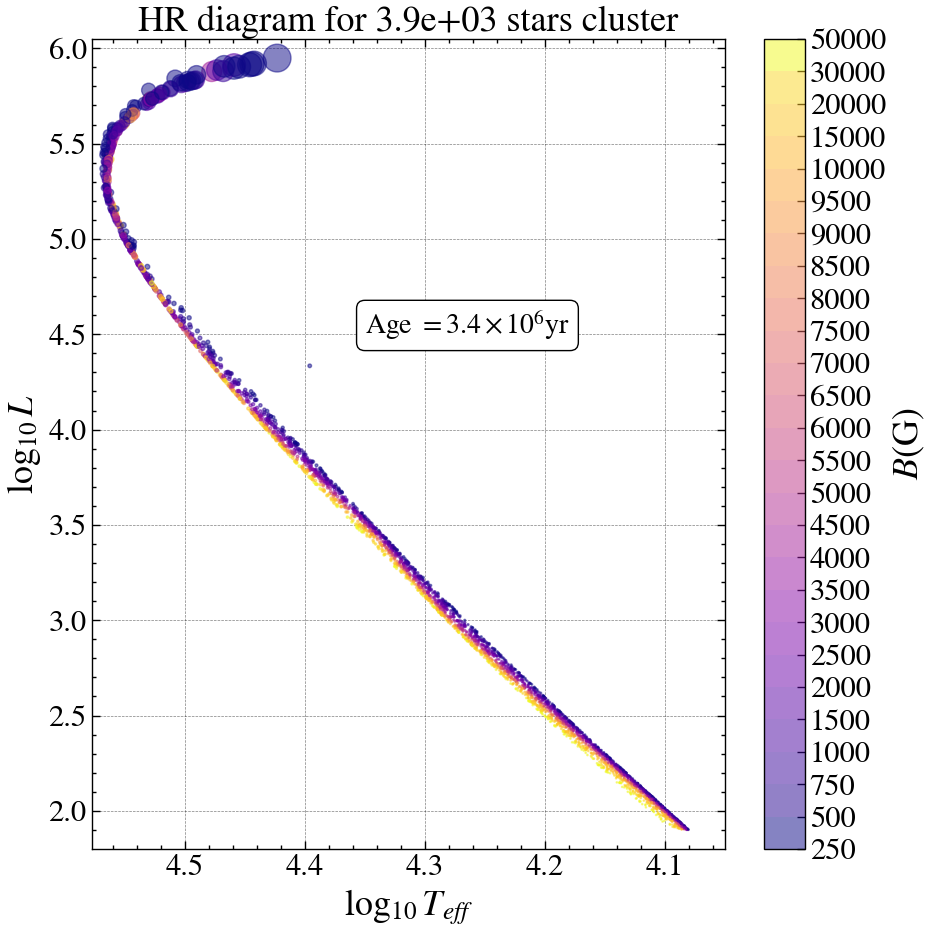

In [21]:
#plot the HR diagram
import matplotlib as mpl
from matplotlib import cm
fig, ax = plt.subplots(figsize=(10,10))

lower = np.linspace(250,1000,4)
middle = np.linspace(1500,10000,18)
upper = np.array([15e3,2e4,3e4,5e4])
bounds = np.concatenate((lower,middle,upper),axis = None)
N = len(bounds)
cmap = plt.get_cmap('plasma', N)
n_stars = data.shape[0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax.set_ylim(np.min(data['log_L'])-0.1,np.nanmax(data['log_L'])+0.1)
#ax.set_ylim(2.55,np.sort(data['log_L'])[-2]+0.1)
ax.set_xlim(4.05,np.nanmax(data['log_Teff'])+0.01)
ax.set_xlabel(r'$\log_{10}{T_{eff}}$')
ax.set_ylabel(r'$\log_{10}{L}$')
ax.set_title('HR diagram for {:.1e} stars cluster'.format(n_stars))
ax.invert_xaxis()
ax.text(4.35, 4.5, r'Age $= 3.4\times10^6$yr', size=20, bbox =dict(boxstyle='round', facecolor = 'white'))
area =0.2* (10**data['log_R'])**2
ban = ax.scatter(data['log_Teff'],data['log_L'],\
                 c =data['Beq'], cmap=cmap,s=area, norm=norm,alpha = 0.5)

fig.colorbar(ban, ticks = bounds,label=r'$B (\mathrm{G})$')
plt.tight_layout()
plt.savefig('figures/HRD_z14mix1_age3.4e6.pdf', format = 'pdf')

In [11]:
# create column with bolometric magnitude
M_bolsun = 4.74
# use the fact that luminosities are already in log
M_bol = M_bolsun - 2.5*data['log_L']
data['M_bol'] = M_bol
data.head()

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq,M_bol
0,5,1,12.42519,4682.17932,4.43918,4.07659,0.34466,0.64163,4.07702,0.0,0.68259,3.418219e+06,4.16684,12.42481,164.25360,4106.12009,-5.451475
1,8,1,31.14667,1063.24164,4.56703,5.26824,0.56808,0.41841,5.26859,0.0,1.02271,3.421601e+06,3.88211,31.00078,93.46208,538.15900,-8.430600
2,23,1,5.47245,21111.73518,4.26003,2.86460,0.28129,0.70462,2.86554,0.0,0.43488,3.535660e+06,4.30468,5.47242,57.80317,22962.04516,-2.421500
3,39,1,3.50900,4875.62374,4.12549,2.13813,0.27180,0.71397,2.13948,0.0,0.34074,3.726868e+06,4.29730,3.50899,254.98440,4976.04165,-0.605325
4,40,1,4.41122,1434.38437,4.18744,2.51036,0.27530,0.71052,2.51151,0.0,0.40295,3.601090e+06,4.27407,4.41121,275.21864,1417.77650,-1.535900


## Calculate the absolute visual magnitude using bolometric corrections

In order to get the apparent magnitude of the stars, we now need to get the absolute magnitude from the bolometric correction given by

$$ BC = M_\mathrm{bol} - M_V$$

To get the volumetric correction we use as a reference the paper from [Torres (2010)](https://iopscience.iop.org/article/10.1088/0004-6256/140/5/1158), specifically Table which specifies how to calculate $BC$ for different $\log(T_\mathrm{eff})$ from the work of [Flower (1996)](https://ui.adsabs.harvard.edu/abs/1996ApJ...469..355F/abstract). The equation states

$$ BC_V = a + b (\log T_\mathrm{eff}) + c (\log T_\mathrm{eff})^2+ ... $$

and the table for the coefficients is given by

|Coefficient	|$\log T_\mathrm{eff} < 3.70$|	$3.70 < \log T_\mathrm{eff} < 3.90$|	$\log T_\mathrm{eff}>3.90$|
| --------------|----------------|-------------------------|------------------|
|a	|-0.190537291496456E+05|	-0.370510203809015E+05|	-0.118115450538963E+06	|
|b	|0.155144866764412E+05|	0.385672629965804E+05|	0.137145973583929E+06	|
|c	|-0.421278819301717E+04|	-0.150651486316025E+05|	-0.636233812100225E+05|	
|d	|0.381476328422343E+03|	0.261724637119416E+04|	0.147412923562646E+05	|
|e	 |... |	-0.170623810323864E+03|	-0.170587278406872E+04|	
|f	 |...| 	 ... |	0.788731721804990E+02|	

In [12]:
#test how to change an values of columns where conditions are met
data['BC'] = np.nan
data.loc[data['Star_state']==1, 'BC'] = 1
data.head()

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq,M_bol,BC
0,5,1,12.42519,4682.17932,4.43918,4.07659,0.34466,0.64163,4.07702,0.0,0.68259,3.418219e+06,4.16684,12.42481,164.25360,4106.12009,-5.451475,1.0
1,8,1,31.14667,1063.24164,4.56703,5.26824,0.56808,0.41841,5.26859,0.0,1.02271,3.421601e+06,3.88211,31.00078,93.46208,538.15900,-8.430600,1.0
2,23,1,5.47245,21111.73518,4.26003,2.86460,0.28129,0.70462,2.86554,0.0,0.43488,3.535660e+06,4.30468,5.47242,57.80317,22962.04516,-2.421500,1.0
3,39,1,3.50900,4875.62374,4.12549,2.13813,0.27180,0.71397,2.13948,0.0,0.34074,3.726868e+06,4.29730,3.50899,254.98440,4976.04165,-0.605325,1.0
4,40,1,4.41122,1434.38437,4.18744,2.51036,0.27530,0.71052,2.51151,0.0,0.40295,3.601090e+06,4.27407,4.41121,275.21864,1417.77650,-1.535900,1.0


In [14]:
#check for 3.70 < log_Teff < 3.90
data[(data['log_Teff']<3.90)]

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq,M_bol,BC


Seems like all it there are no stars of $\log T_\mathrm{eff}< 3.90$ 

In [22]:
a0 = -0.190537291496456e5
b0 = 0.155144866764412e5
c0 = -0.421278819301717e4
d0 = 0.381476328422343E+03
logT_0 = data['log_Teff'][data['log_Teff']<3.70]
bc0 = a0 + b0*logT_0 + c0*(logT_0)**2 + d0*(logT_0)**3 
data.loc[data['log_Teff']<3.70, 'BC'] = bc0

Now doing the rest of the stars

In [23]:
#check for log_Teff > 3.90
data[data['log_Teff']>3.90]

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq,BC
0,5,1,12.42519,4682.17932,4.43918,4.07659,0.34466,0.64163,4.07702,0.0,0.68259,3.418219e+06,4.16684,12.42481,164.25360,4106.12009,NaN
1,8,1,31.14667,1063.24164,4.56703,5.26824,0.56808,0.41841,5.26859,0.0,1.02271,3.421601e+06,3.88211,31.00078,93.46208,538.15900,NaN
2,23,1,5.47245,21111.73518,4.26003,2.86460,0.28129,0.70462,2.86554,0.0,0.43488,3.535660e+06,4.30468,5.47242,57.80317,22962.04516,NaN
3,39,1,3.50900,4875.62374,4.12549,2.13813,0.27180,0.71397,2.13948,0.0,0.34074,3.726868e+06,4.29730,3.50899,254.98440,4976.04165,NaN
4,40,1,4.41122,1434.38437,4.18744,2.51036,0.27530,0.71052,2.51151,0.0,0.40295,3.601090e+06,4.27407,4.41121,275.21864,1417.77650,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,156100,1,6.39461,16280.90968,4.29681,3.10357,0.28722,0.69875,3.10439,0.0,0.48083,3.454044e+06,4.28098,6.39457,90.13124,17108.55078,NaN
3887,156133,1,3.79140,3159.36211,4.14756,2.26934,0.27275,0.71304,2.27064,0.0,0.36220,3.621914e+06,4.28967,3.79140,262.78304,3189.38951,NaN
3888,156146,1,3.05928,1644.13964,4.08528,1.92661,0.27049,0.71526,1.92780,0.0,0.31539,3.522914e+06,4.29181,3.05927,275.28281,1642.02379,NaN
3889,156148,1,3.54445,1336.83852,4.12498,2.15265,0.27178,0.71399,2.15387,0.0,0.34903,3.648054e+06,4.28515,3.54444,278.64299,1329.30886,NaN


In [24]:
#compute the BC for logTeff>3.90
a = -0.118115450538963e6
b= 0.137145973583929e6
c = -0.636233812100225e5
d = 0.147412923562646e5
e = -0.170587278406872e4
f = 0.788731721804990e2
logT = data['log_Teff'][data['log_Teff']>3.90]
bc = a + b*logT + c*(logT)**2 + d*(logT)**3 +e*(logT)**4 + f*(logT)**5 
data.loc[data['log_Teff']>3.90, 'BC'] = bc

In [25]:
data.head()

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq,BC
0,5,1,12.42519,4682.17932,4.43918,4.07659,0.34466,0.64163,4.07702,0.0,0.68259,3.418219e+06,4.16684,12.42481,164.25360,4106.12009,-2.648590
1,8,1,31.14667,1063.24164,4.56703,5.26824,0.56808,0.41841,5.26859,0.0,1.02271,3.421601e+06,3.88211,31.00078,93.46208,538.15900,-3.534519
2,23,1,5.47245,21111.73518,4.26003,2.86460,0.28129,0.70462,2.86554,0.0,0.43488,3.535660e+06,4.30468,5.47242,57.80317,22962.04516,-1.683493
3,39,1,3.50900,4875.62374,4.12549,2.13813,0.27180,0.71397,2.13948,0.0,0.34074,3.726868e+06,4.29730,3.50899,254.98440,4976.04165,-0.952406
4,40,1,4.41122,1434.38437,4.18744,2.51036,0.27530,0.71052,2.51151,0.0,0.40295,3.601090e+06,4.27407,4.41121,275.21864,1417.77650,-1.301320


Text(0.5, 0, '$\\log T_\\mathrm{eff}$')

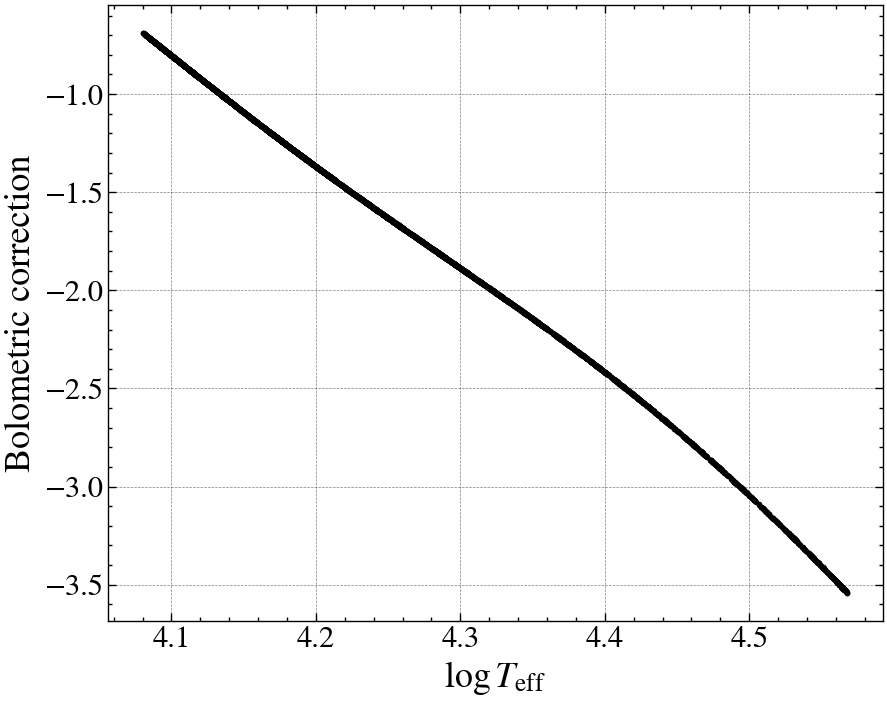

In [26]:
# plot the bolometric corrections
plt.plot(data['log_Teff'], data['BC'],'.', color = 'k')
plt.ylabel('Bolometric correction')
plt.xlabel(r'$\log T_\mathrm{eff}$')

## Calculate $M_V$ as shown by [Torres](https://iopscience.iop.org/article/10.1088/0004-6256/140/5/1158#aj363350s3)

In this paper the author shows that to calculate $M_V$ we also need to the apparent magnitude of the Sun, and the Sun bolometric correction as shown in the following equation

$$M_V = -2.5\log\left(\frac{L}{L_\odot}\right) +V_\odot + 31.572 -(BC_V - BC_{V\odot})$$

where $V_\odot = −26.76$ is the aparent magnitude of the Sun, $BC_{V\odot}= −0.06$ is the bolometric correction for the Sun adopted in the paper and the other number is a numerical constant. 

I will proceed with this equation to get the visual magnitude of the stars

In [27]:
v_sun = -26.76
bc_sun = -0.06
M_v = -2.5*data['log_L'] + v_sun +31.572-(data['BC']- bc_sun)
data['M_V'] = M_v

(0.9271985453887581, -7.76759738216549)

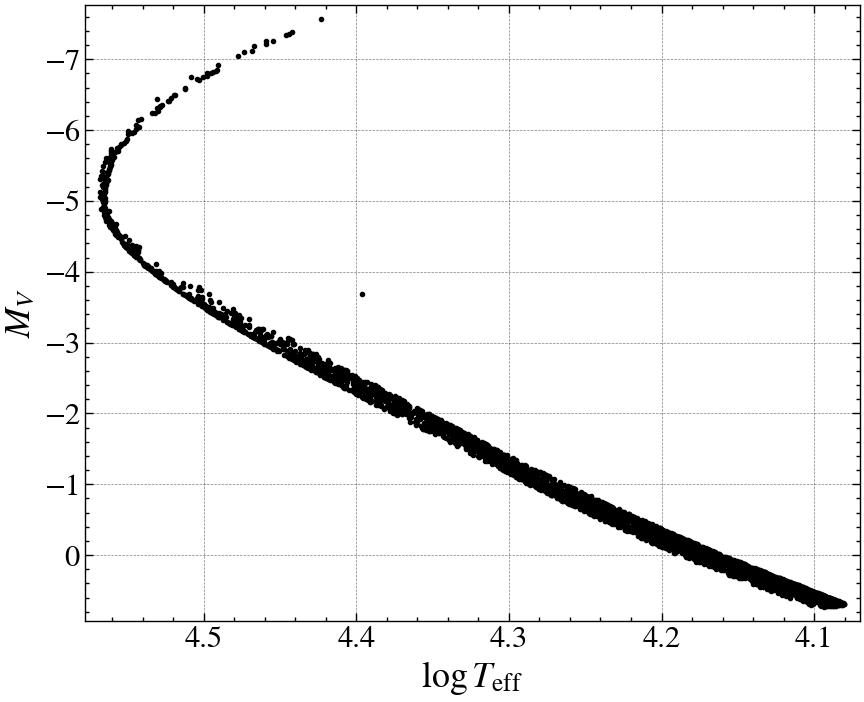

In [28]:
#plot the visual absolute magnitude
plt.plot(data['log_Teff'], data['M_V'], '.', color ='k')
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel(r'$M_V$')
plt.xlim(max(data['log_Teff'])+0.01, min(data['log_Teff'])-0.01)
plt.ylim(max(data['M_V'])+0.2, min(data['M_V'])-0.2)

## Determine the aparent magnitude $V$ using the distance modulus equation

Having found $M_V$ allows us to now calculate the aparent magnitude $V$ for the stars in our cluster. Assuming the distance to the cluster is similar to the distance to the orion cluster, $\approx 400$ pc, we use the distance modulus equation 

$$ V - M_V = 5 \log\left(\frac{d}{10\mathrm{pc}}\right)$$

where $d$ is the distance to the cluster. In the next lines of code we compute $V$ for all our stars

In [29]:
#compute v
d = 400  #parsecs
m_v = data['M_V'] + 5*np.log10(d/10)
data['m_V'] = m_v
data.head()

,#Star_ID,Star_state,Minit,Binit,log_Teff,log_L,center_he4,center_h1,log_Lnuc,he_core_mass,log_R,star_age,log_g,star_mass,surf_avg_v_rot,Beq,BC,M_V,m_V
0,5,1,12.42519,4682.17932,4.43918,4.07659,0.34466,0.64163,4.07702,0.0,0.68259,3.418219e+06,4.16684,12.42481,164.25360,4106.12009,-2.648590,-2.790885,5.219415
1,8,1,31.14667,1063.24164,4.56703,5.26824,0.56808,0.41841,5.26859,0.0,1.02271,3.421601e+06,3.88211,31.00078,93.46208,538.15900,-3.534519,-4.884081,3.126219
2,23,1,5.47245,21111.73518,4.26003,2.86460,0.28129,0.70462,2.86554,0.0,0.43488,3.535660e+06,4.30468,5.47242,57.80317,22962.04516,-1.683493,-0.726007,7.284293
3,39,1,3.50900,4875.62374,4.12549,2.13813,0.27180,0.71397,2.13948,0.0,0.34074,3.726868e+06,4.29730,3.50899,254.98440,4976.04165,-0.952406,0.359081,8.369381
4,40,1,4.41122,1434.38437,4.18744,2.51036,0.27530,0.71052,2.51151,0.0,0.40295,3.601090e+06,4.27407,4.41121,275.21864,1417.77650,-1.301320,-0.222580,7.787720


(8.837498502028568, 0.24270257447432114)

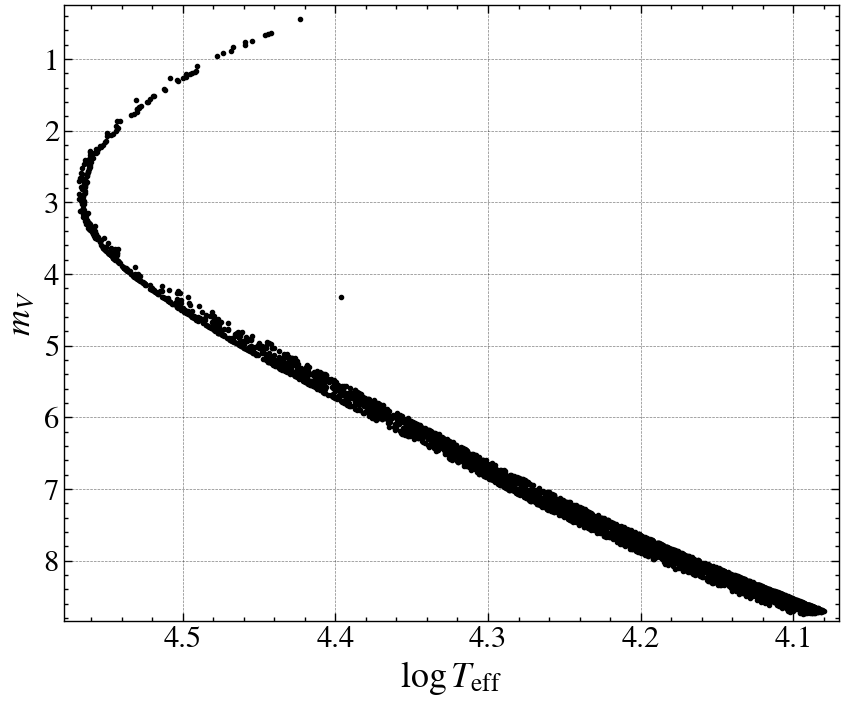

In [30]:
#plot the visual absolute magnitude
plt.plot(data['log_Teff'], data['m_V'], '.', color ='k')
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel(r'$m_V$')
plt.xlim(max(data['log_Teff'])+0.01, min(data['log_Teff'])-0.01)
plt.ylim(max(data['m_V'])+0.1, min(data['m_V']) -0.2)

## Assign values of $v\sin i$

Now I will asign a value of the stellar rotation, which must follow a disttribution of $\sin i$. The probability distribution of the inclination angle $i$ is given by

$$ P(i)di = \sin (i)di $$

Calculating the cumulative distribution $C(i)$ which has value between 1 and 0 then we can invert it, to solve for it. Define $C(i)$ as the integral of $P(i)$ over a minimum value of $i_\mathrm{min}$ up to $i$

$$ C(i) = \int_{i_\mathrm{min}}^{i} P(i) di = \int_{i_\mathrm{min}}^{i}\sin i di $$

$$ C(i) = -\cos(i) \big\vert_{i_\mathrm{min}}^{i} = \cos(i_\mathrm{min}) -\cos(i) $$

Taking $i_\mathrm{min} =0$ and solving for $i$ gives

$$ i(C) = \arccos\left( 1 - C\right)$$

For the magnitude of the velocity this model includes value for them which means that I will be using $\texttt{surf_avg_v_rot}$ as the value for the rotation

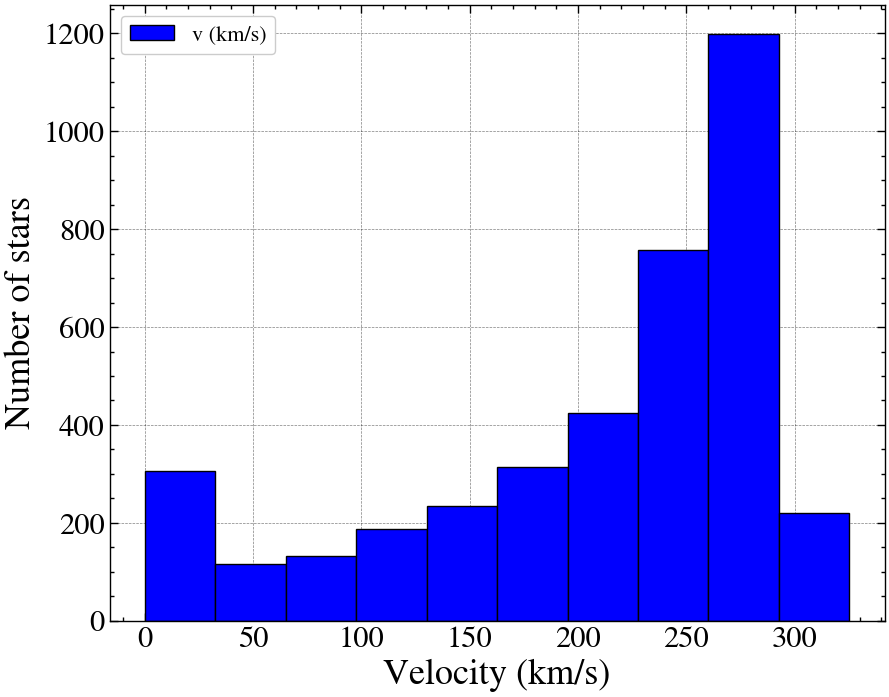

In [31]:
#plot the rotation
plt.hist(data['surf_avg_v_rot'], color= 'b',label = 'v (km/s)', edgecolor = 'k')
plt.ylabel('Number of stars')
plt.xlabel('Velocity (km/s)')
plt.legend()

In [32]:
c = np.random.rand(len(data))
i_val = np.arccos(1 - c)
v_sini= data['surf_avg_v_rot']*np.sin(i_val)   #set the units in km/s

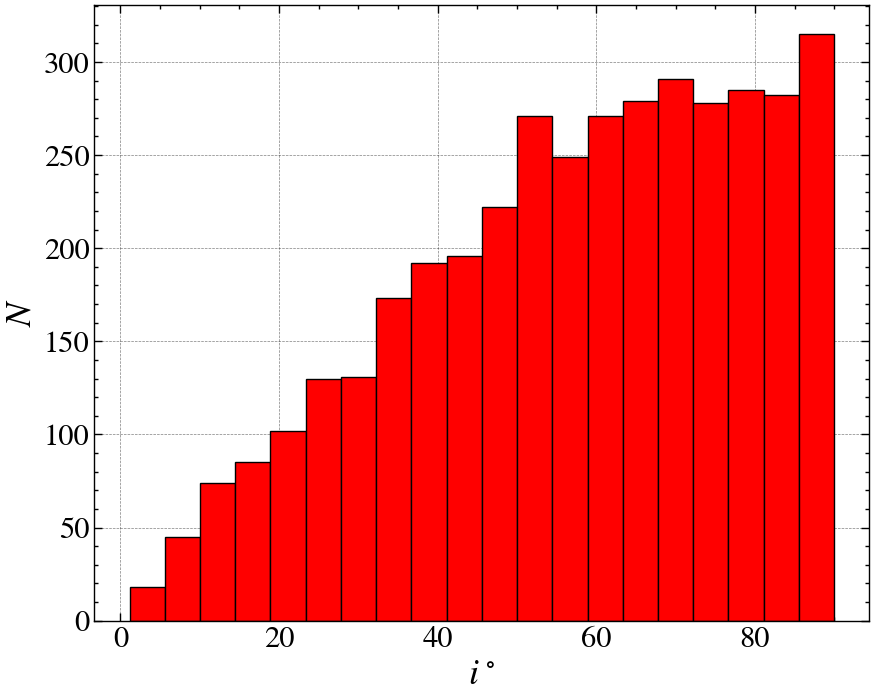

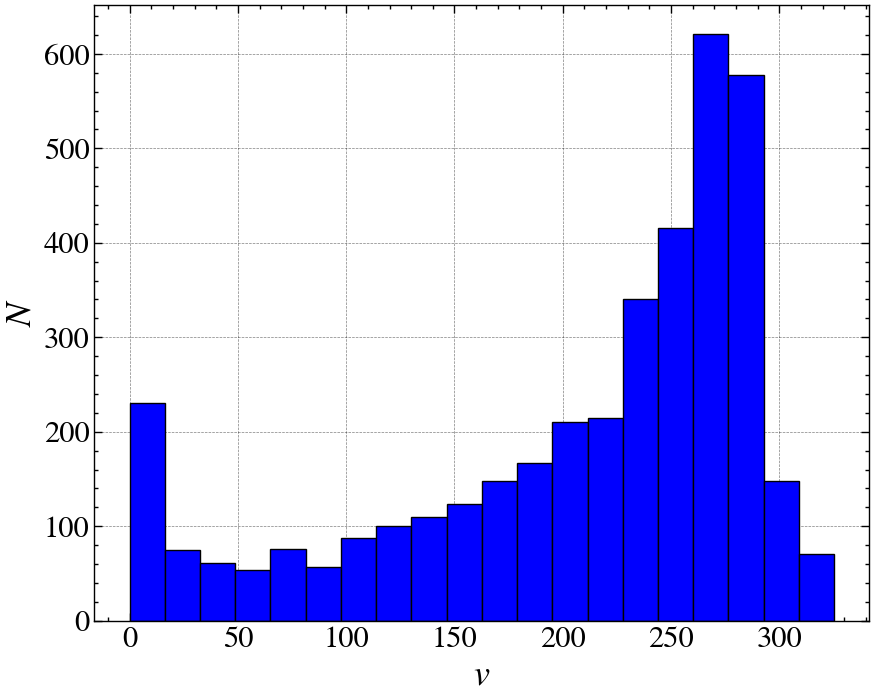

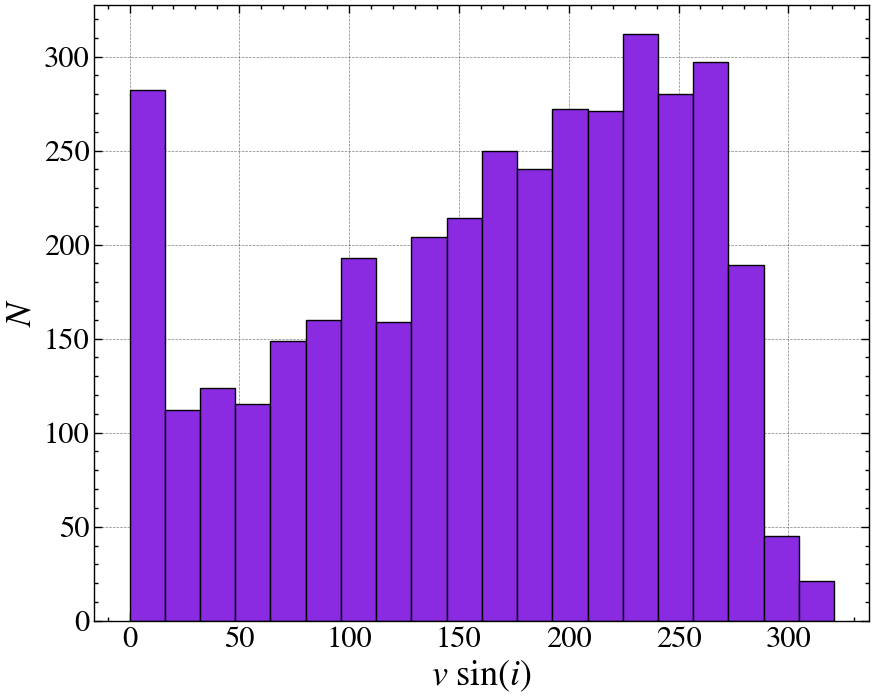

In [33]:
plt.figure()
plt.hist(i_val*180/np.pi,20, color = 'r', edgecolor = 'k')
plt.ylabel(r'$N$')
plt.xlabel(r'$i^\circ$')
plt.figure()
plt.ylabel(r'$N$')
plt.xlabel(r'$v$')
plt.hist(data['surf_avg_v_rot'],20, color = 'b', edgecolor ='k')
plt.figure()
plt.ylabel(r'$N$')
plt.xlabel(r'$v~\sin(i)$')
plt.hist(v_sini, 20, color = 'blueviolet', edgecolor = 'k');

In [34]:
#add to the data frame
data['vsini'] = v_sini

## Calcuate signal to noise ratios (SNR) based on an exposure time

Following the steps from the MOBSTER exposure time spreadsheet, now we want to find the value of SNR given an exposure time and find the minimum value of $B$ we can detect. To do so we need to do:

* Define an exposure time
* Calculate the sub exposure time 
$$s_\mathrm{exp} = \frac{t_\mathrm{exp}}{4}$$
* Calculate the $SNR_\mathrm{bin}$

$$ SNR_\mathrm{bin} = 430\times 10^{\frac{8.4-V}{5}} \sqrt{\frac{4~s_\mathrm{exp}}{3200}}$$

* Calculate $SNR_\mathrm{1.8 km/s}$

$$ SNR_\mathrm{1.8 km/s} =\left\{ 
  \begin{array}{ c l }
    SNR_\mathrm{bin} & \quad \textrm{if } v\sin(i) \leq 18 \mathrm{km/s} \\
    SNR_\mathrm{bin}\times{\sqrt{\frac{v\sin(i)}{18\mathrm{km/s}}}}     & \quad \textrm{if } v\sin(i) > 18 \mathrm{km/s}
  \end{array}
\right.$$

* Calculate $SNR_\mathrm{LSD}$

$$ SNR_\mathrm{LSD} = SNR_\mathrm{1.8 km/s} \times LSD_\mathrm{gain}$$

In [35]:
#define exposure time in seconds
t_exp = 7200 # 2hours in seconds
s_exp = t_exp /4
snr_bin = 430*10**((8.4-data['m_V'])/5)*np.sqrt(4*s_exp/3200)
data['SNR_b'] = snr_bin
snr_18_a = data['SNR_b'][data['vsini']<=18]
snr_18_b = data['SNR_b'][data['vsini']>18]*np.sqrt(data['vsini'][data['vsini']>18]/18)
data['SNR_1.8'] = np.nan
data.loc[data['vsini']<=18, 'SNR_1.8'] = snr_18_a
data.loc[data['vsini']>18, 'SNR_1.8'] = snr_18_b

Text(0, 0.5, '$SNR_\\mathrm{1.8km/s}$')

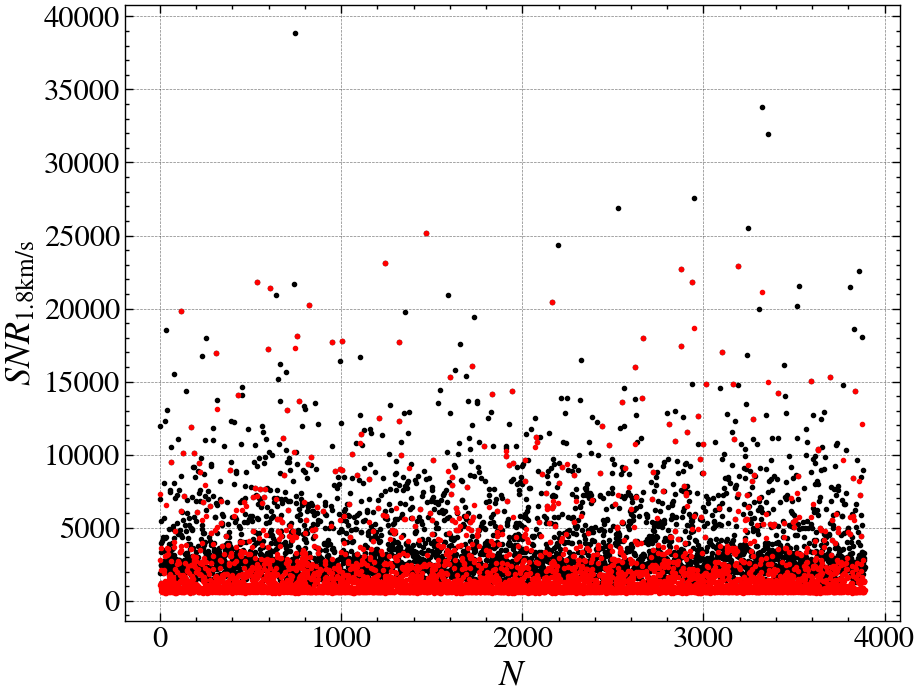

In [36]:
#check by plotting the SNRs
plt.figure()
plt.plot(data['SNR_1.8'], '.', color = 'k')
plt.plot(data['SNR_b'], '.', color = 'r')
plt.xlabel(r'$N$')
plt.ylabel(r'$SNR_\mathrm{1.8km/s}$')

### To calculate the $SNR_\mathrm{LSD}$ first I need to find a relation between spectral type and temperature to get the LSD gain

In [40]:
lsd_table = pd.read_excel('~/Fall2022/mobster_exptime.ods', sheet_name = 'LSD_gain')
lsd_table.loc[len(lsd_table.index)] = lsd_table.columns
lsd_table.columns = ['Spectral Type', 'LSD']
lsd_table = lsd_table.shift(periods=1, fill_value=3)
lsd_table['Spectral Type'][0] = 'O4'
lsd_table

/var/folders/0k/wk2w1g0j4k98pnj_h72vyq_r0000gn/T/ipykernel_88791/2630265157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lsd_table['Spectral Type'][0] = 'O4'


,Spectral Type,LSD
0,O4,3
1,O5,3
2,O6,4
3,O7,4
4,O8,5
5,O9,5
6,B0,6
7,B1,7
8,B2,8
9,B3,9


Temperatures used below for each spectral type are taken from tables found in the following links: [table1](https://sites.uni.edu/morgans/astro/course/Notes/section2/spectralmasses.html) [table2](https://en.wikipedia.org/wiki/A-type_main-sequence_star#:~:text=A%2Dtype%20stars%20are%20young,debris%20disk%20where%20planets%20form.)

Text(0, 0.5, 'LSD gain')

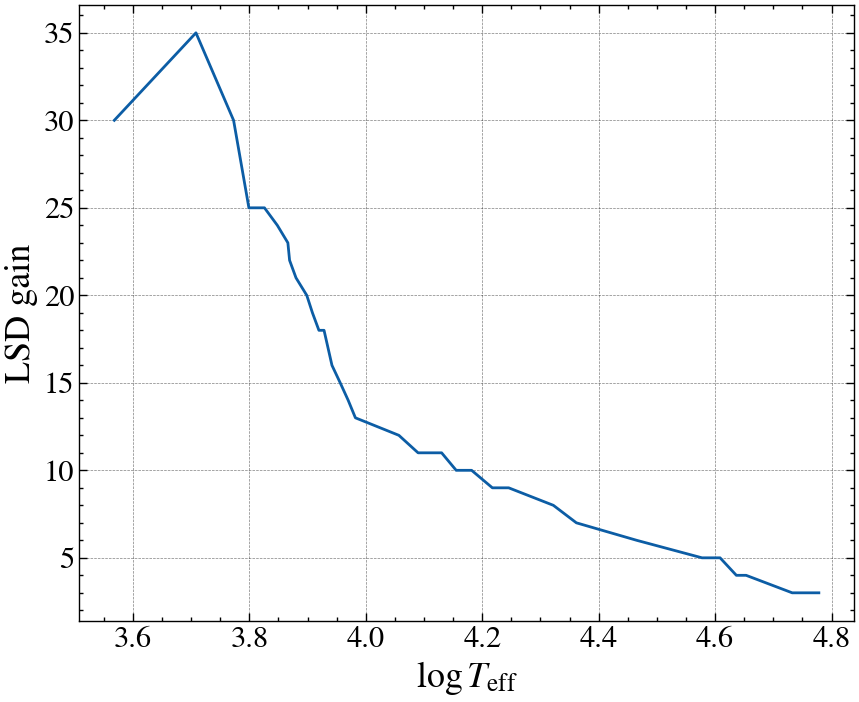

In [41]:
#make array of temperatures from the tables
temp = [6e4,54e3,45e3,433e2,406e2,378e2,292e2,23e3,21e3,176e2,165e2,152e2,143e2,135e2,\
       123e2, 114e2, 96e2,9330, 9040,8750,8480,8310,8100,7920,7590, 7400,7350,7050, 6700, 6300, 5930, 5110, 3700]
plt.plot(np.log10(temp), lsd_table['LSD'])
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel('LSD gain')

Now I we fit a a line to the relation found above

Text(0, 0.5, 'LSD gain')

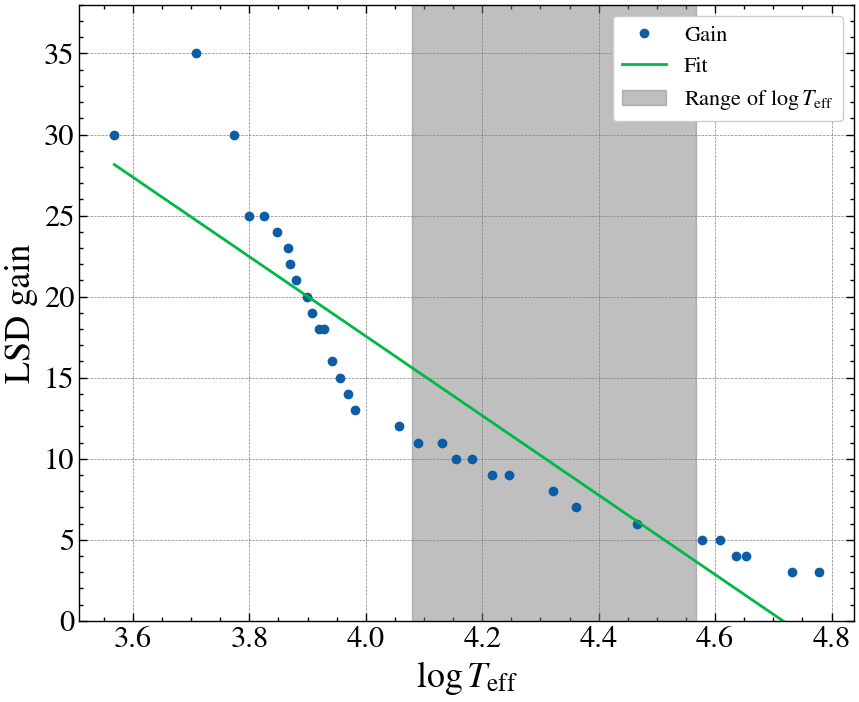

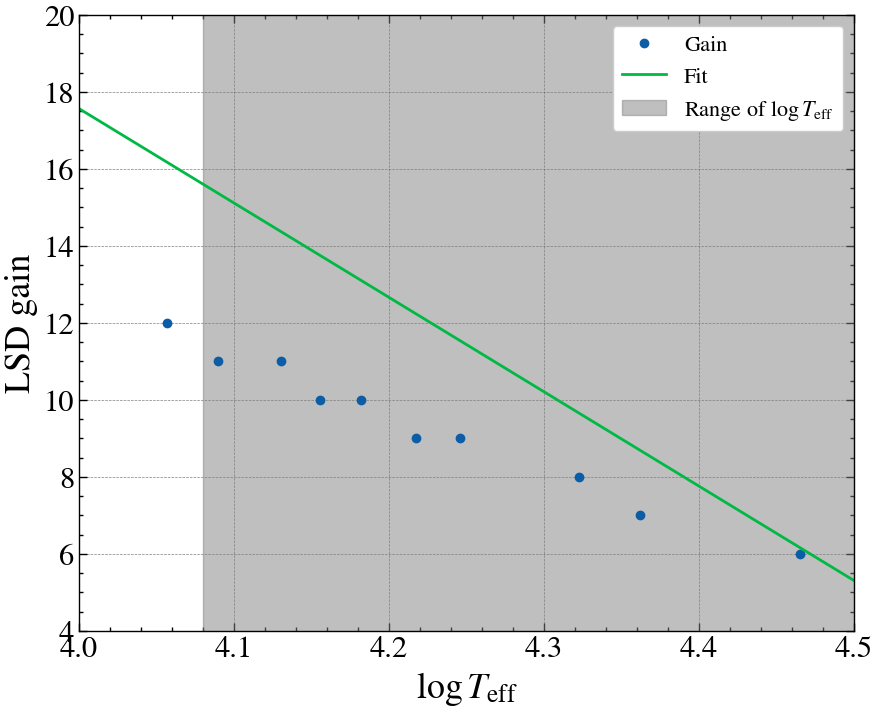

In [44]:
#try linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(temp),lsd_table['LSD'])
plt.figure()
plt.plot(np.log10(temp), lsd_table['LSD'],'o', label='Gain')
plt.plot(np.log10(temp), intercept + slope*np.log10(temp), label='Fit')
plt.fill_betweenx([-10,40], np.min(data['log_Teff']), np.max(data['log_Teff']), color='gray', alpha = 0.5, \
                       label =r'Range of $\log T_\mathrm{eff}$')
plt.legend()
plt.ylim(0,38)
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel('LSD gain')

plt.figure()
plt.plot(np.log10(temp), lsd_table['LSD'],'o', label='Gain')
plt.plot(np.log10(temp), intercept + slope*np.log10(temp), label='Fit')
plt.fill_betweenx([-10,40], np.min(data['log_Teff']), np.max(data['log_Teff']), color='gray', alpha = 0.5, \
                       label =r'Range of $\log T_\mathrm{eff}$')
plt.legend()
plt.ylim(4,20)
plt.xlim(4.0,4.5)
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel('LSD gain')

We don't need to do a linear fit over the whole range of temperatures and we can only focus on the range of temperatures from our stellar population

Text(0, 0.5, 'LSD gain')

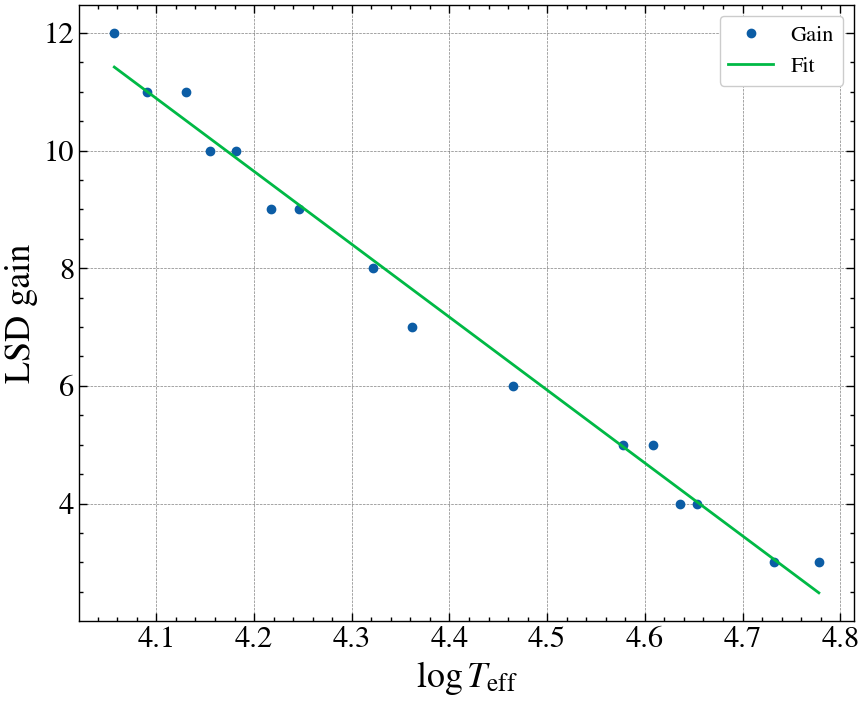

In [45]:
lsd_table['log_Teff'] = np.log10(temp)
slope, intercept, r_value, p_value, std_err = \
stats.linregress(lsd_table['log_Teff'][lsd_table['log_Teff']>4.0], lsd_table['LSD'][lsd_table['log_Teff']>4.0])

plt.figure()
plt.plot(lsd_table['log_Teff'][lsd_table['log_Teff']>4.0], lsd_table['LSD'][lsd_table['log_Teff']>4.0],\
         'o', label='Gain')
plt.plot(lsd_table['log_Teff'][lsd_table['log_Teff']>4.0],\
         intercept + slope*lsd_table['log_Teff'][lsd_table['log_Teff']>4.0], label='Fit')
#plt.fill_betweenx([-10,40], np.min(data['log_Teff']), np.max(data['log_Teff']), color='gray', alpha = 0.5, \
                       #label =r'Tempertures')
plt.legend()
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel('LSD gain')

A much better fit!

In [46]:
#print the values of linear fit to use in the computation on the server
print('Slope:', slope)
print('Intercept:', intercept)

Slope: -12.388115933619902
Intercept: 61.67535680103128


### We can go back to calcultating the $SNR_\mathrm{LSD}$ for our set of stars now that we have our LSD gain

In [47]:
lsd_gain = intercept + slope*data['log_Teff']
snr = data['SNR_1.8']*lsd_gain
data['SNR'] = snr

Text(0, 0.5, '$SNR$')

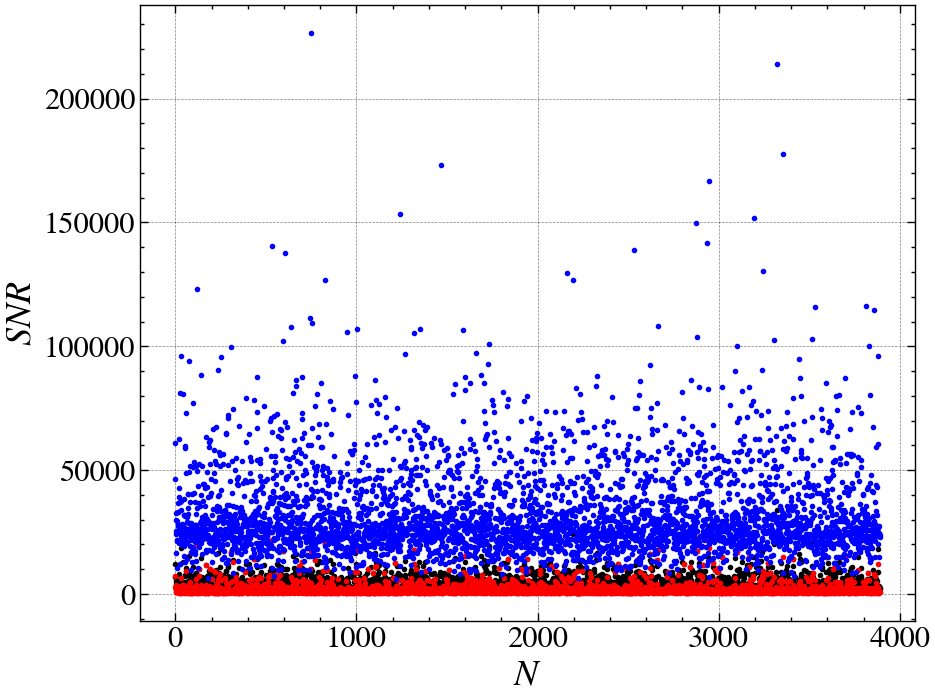

In [48]:
#check by plotting the SNRs
plt.figure()
plt.plot(data['SNR_1.8'], '.', color = 'k')
plt.plot(data['SNR_b'], '.', color = 'r')
plt.plot(data['SNR'], '.', color = 'b')
plt.xlabel(r'$N$')
plt.ylabel(r'$SNR$')

## Estimate the observational magnetic field

From the MOBSTER spreadsheet we find the value of the magnetic field from the $SNR_\mathrm{LSD}$ as

$$ B_{0.1} = \left\{ 
  \begin{array}{ c l }
    \left(200+289 \times v\sin (i)\right) SNR^{-1} & \quad \textrm{if } v\sin(i) \leq 40 \mathrm{km/s} \\
    \left(-32243+ 1077.9 \times v\sin (i)\right) SNR^{-1}     & \quad \textrm{if } v\sin(i) > 40 \mathrm{km/s}
  \end{array}
\right.$$

In [49]:
b_min_a = (200+ 289*data['vsini'][data['vsini']<= 40])/data['SNR'][data['vsini']<= 40]
b_min_b = (-32243 + 1077.9*data['vsini'][data['vsini']> 40])/data['SNR'][data['vsini']>40]
data['B_min'] = np.nan
data.loc[data['vsini']<=40, 'B_min'] = b_min_a*100
data.loc[data['vsini']>40, 'B_min'] = b_min_b*100

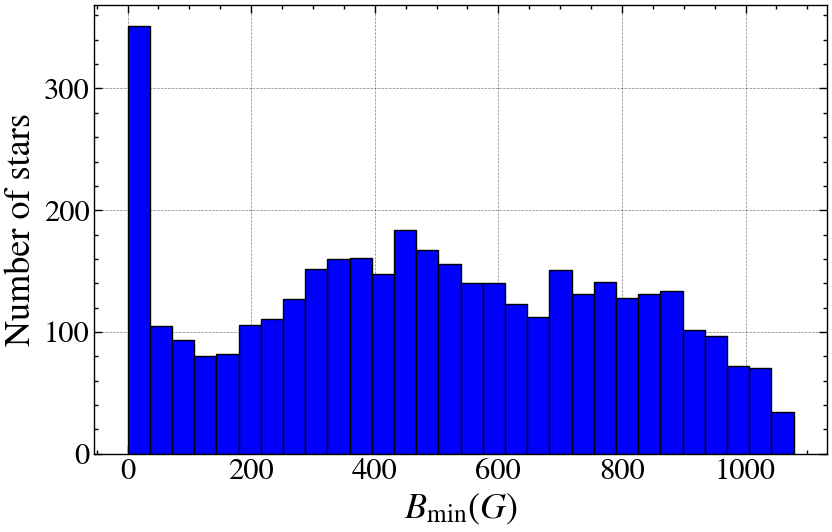

In [50]:
plt.figure(figsize=(9,6))
plt.hist(data['B_min'],30, color = 'b', edgecolor = 'k');
plt.xlabel(r'$B_\mathrm{min} (G)$')
plt.ylabel(r'Number of stars')
plt.tight_layout()
plt.savefig('figures/B_min_histogram_z14mix1_age3.4e6.pdf', format = 'pdf')
#plt.xlim(0,2500)

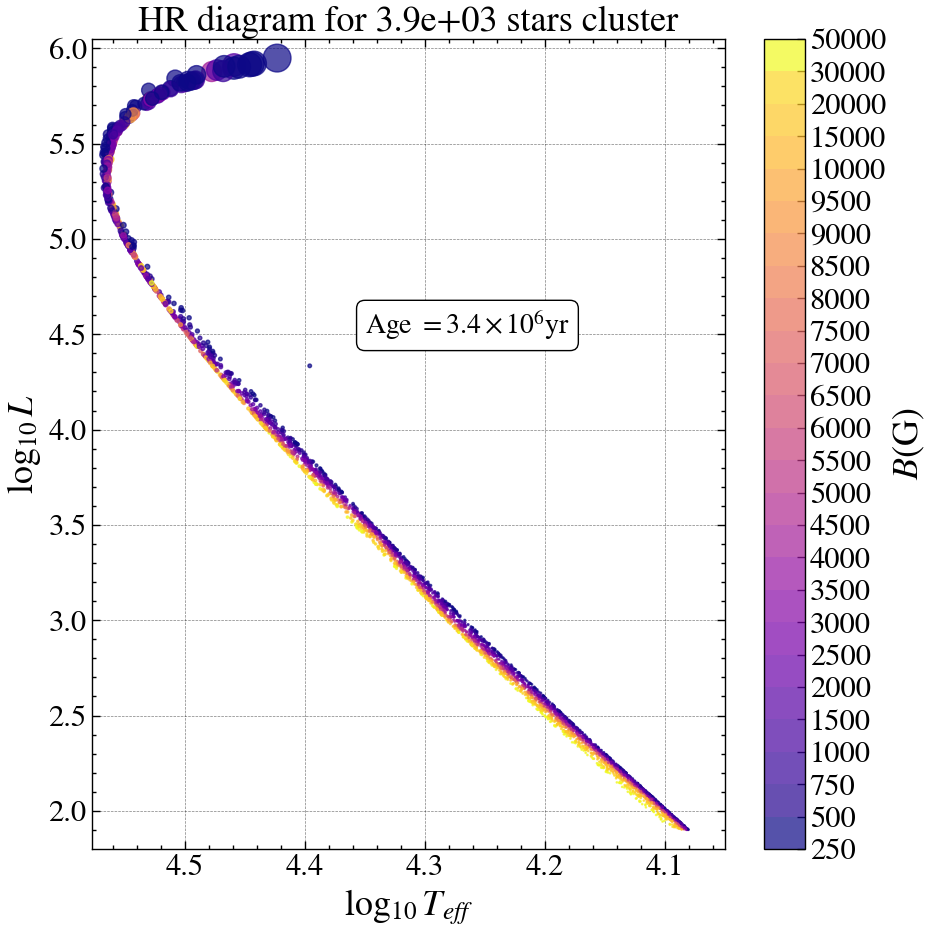

In [51]:
#plot the HR diagram
import matplotlib as mpl
from matplotlib import cm
fig, ax = plt.subplots(figsize=(10,10))

lower = np.linspace(250,1000,4)
middle = np.linspace(1500,10000,18)
upper = np.array([15e3,2e4,3e4,5e4])
bounds = np.concatenate((lower,middle,upper),axis = None)
N = len(bounds)
cmap = plt.get_cmap('plasma', N)
n_stars = data.shape[0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax.set_ylim(np.min(data['log_L'])-0.1,np.nanmax(data['log_L'])+0.1)
#ax.set_ylim(2.55,np.sort(data['log_L'])[-2]+0.1)
ax.set_xlim(4.05,np.nanmax(data['log_Teff'])+0.01)
ax.set_xlabel(r'$\log_{10}{T_{eff}}$')
ax.set_ylabel(r'$\log_{10}{L}$')
ax.set_title('HR diagram for {:.1e} stars cluster'.format(n_stars))
ax.invert_xaxis()
ax.text(4.35, 4.5, r'Age $= 3.4\times10^6$yr', size=20, bbox =dict(boxstyle='round', facecolor = 'white'))
area =0.2* (10**data['log_R'])**2
ban = ax.scatter(data['log_Teff'],data['log_L'],\
                 c =data['Beq'], cmap=cmap,s=area, norm=norm,alpha = 0.7)

fig.colorbar(ban, ticks = bounds,label=r'$B (\mathrm{G})$')
plt.tight_layout()
plt.savefig('figures/HRD_z14mix1_age3.4e6.pdf', format = 'pdf')

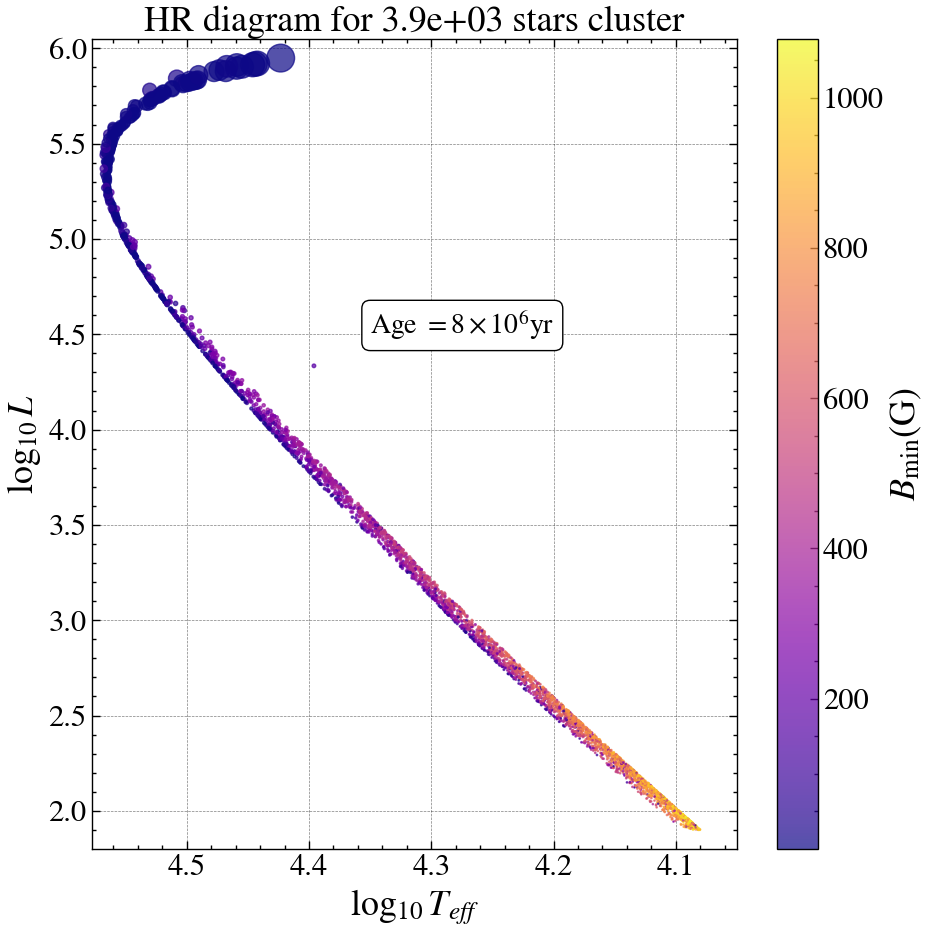

In [52]:
#plot the HR diagram now with the minimum detectable B field
plt.figure(figsize=(10,10))

cmap = plt.get_cmap('plasma')
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
n_stars = data.shape[0]
plt.ylim(np.min(data['log_L'])-0.1,np.nanmax(data['log_L'])+0.1)
#ax.set_ylim(2.55,np.sort(data['log_L'])[-2]+0.1)
plt.xlim(np.nanmax(data['log_Teff'])+0.01,4.05)
plt.xlabel(r'$\log_{10}{T_{eff}}$')
plt.ylabel(r'$\log_{10}{L}$')
plt.title('HR diagram for {:.1e} stars cluster'.format(n_stars))
plt.text(4.35, 4.5, r'Age $= 8\times10^6$yr', size=20, bbox =dict(boxstyle='round', facecolor = 'white'))
area =0.2* (10**data['log_R'])**2
plt.scatter(data['log_Teff'],data['log_L'],\
                 c =data['B_min'], cmap=cmap,s=area,alpha = 0.7)
plt.colorbar(label = r'$B_\mathrm{min}$(G)')
plt.tight_layout()
#plt.savefig('figures/HRD_testcase0_age8e6.pdf', format = 'pdf')

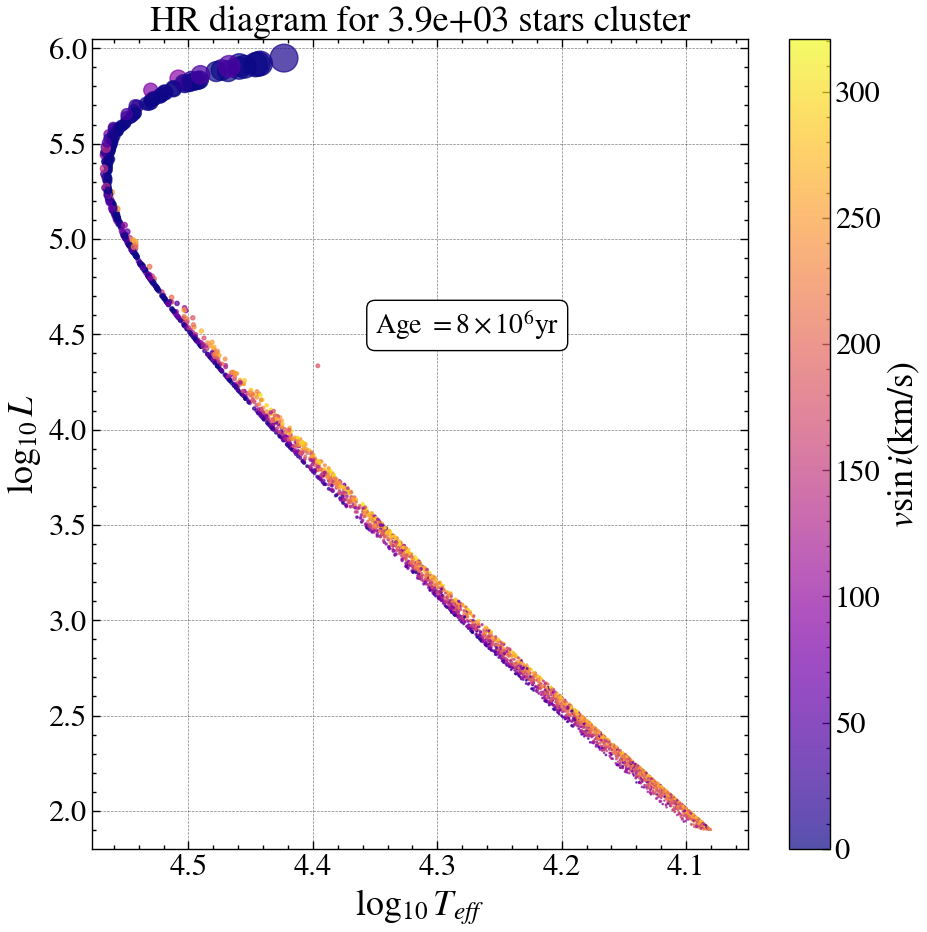

In [53]:
#plot the HR diagram now with the values of vsini
plt.figure(figsize=(10,10))

cmap = plt.get_cmap('plasma')
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
n_stars = data.shape[0]
plt.ylim(np.min(data['log_L'])-0.1,np.nanmax(data['log_L'])+0.1)
#ax.set_ylim(2.55,np.sort(data['log_L'])[-2]+0.1)
plt.xlim(np.nanmax(data['log_Teff'])+0.01,4.05)
plt.xlabel(r'$\log_{10}{T_{eff}}$')
plt.ylabel(r'$\log_{10}{L}$')
plt.title('HR diagram for {:.1e} stars cluster'.format(n_stars))
plt.text(4.35, 4.5, r'Age $= 8\times10^6$yr', size=20, bbox =dict(boxstyle='round', facecolor = 'white'))
area =0.2* (10**data['log_R'])**2
plt.scatter(data['log_Teff'],data['log_L'],\
                 c =data['vsini'], cmap=cmap,s=area,alpha = 0.7)
plt.colorbar(label = r'$v\sin{i}$(km/s)')
plt.tight_layout()
#plt.savefig('figures/HRD_testcase0_age8e6.pdf', format = 'pdf')

There seems to be a relationship between the values of $B_{min}$ with the values of $ v~\sin i$ and $\log L$

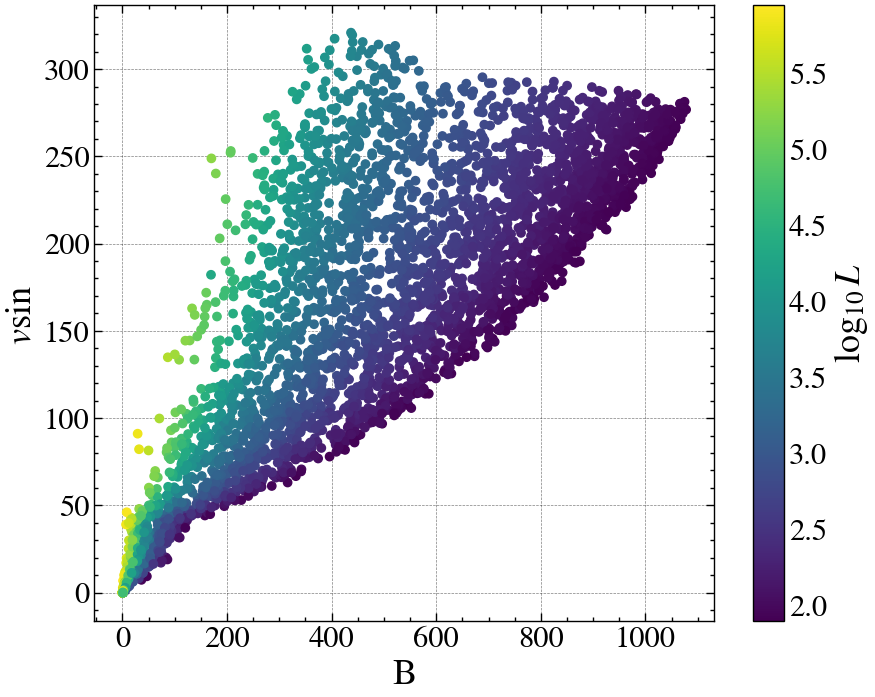

In [56]:
plt.scatter(data['B_min'], data['vsini'],c = data['log_L'])
plt.xlabel('B')
plt.ylabel(r'$v\sin$ ')
plt.colorbar(label = r'$\log_{10} L$')

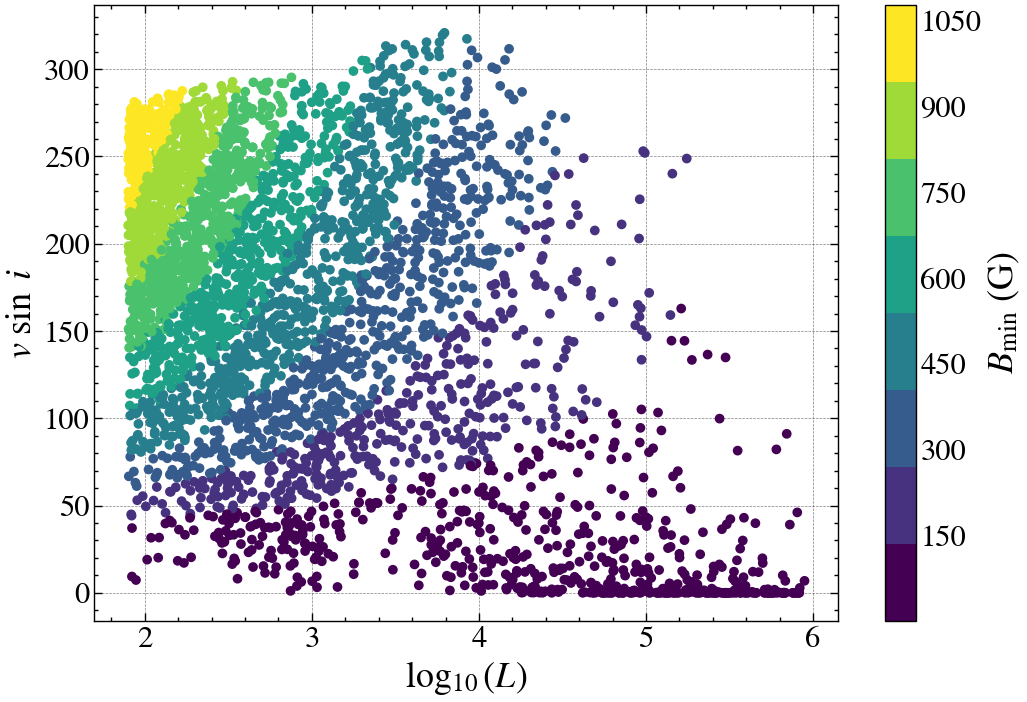

In [57]:
bounds = np.arange(0,1200,150)
N = len(bounds)
cmap = plt.get_cmap('viridis', N)
plt.figure(figsize=(12,8))
plt.scatter(data['log_L'], data['vsini'],c = data['B_min'],cmap = cmap )
plt.xlabel('$\log_{10} (L)$')
plt.ylabel('$v ~\sin ~i$')
plt.colorbar(label = '$B_\mathrm{min}$ (G)', ticks = bounds)
plt.savefig('figures/vsini_L_bmin.pdf', format = 'pdf')

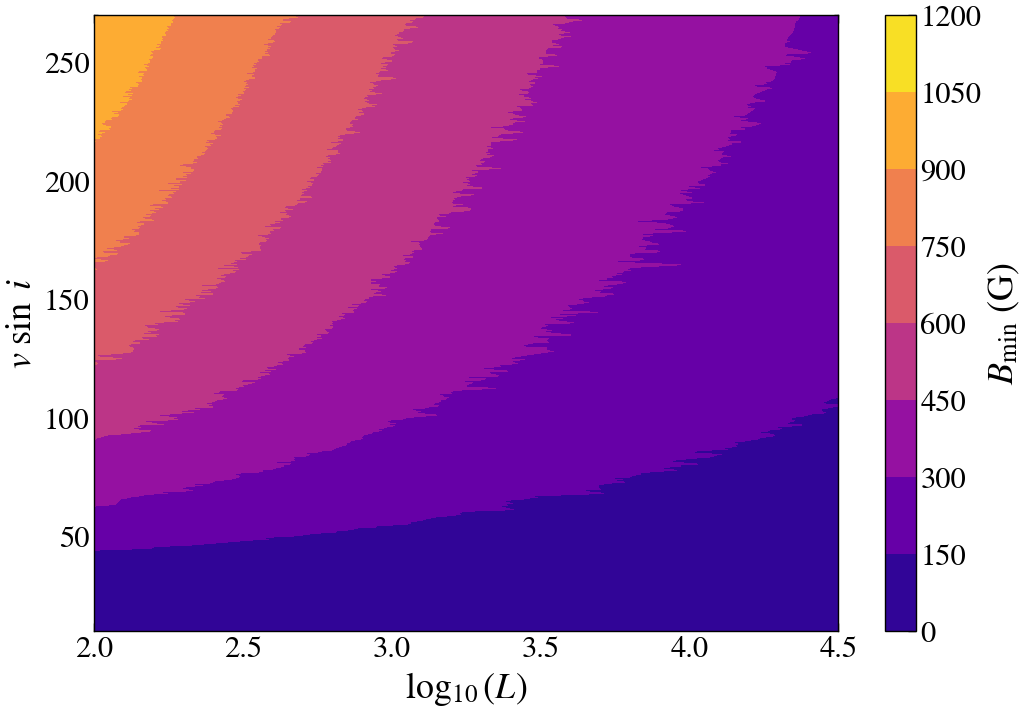

In [58]:
#make a contour plot
plt.figure(figsize=(12,8))
plt.tricontourf(data['log_L'], data['vsini'], data['B_min'], cmap = 'plasma')
plt.colorbar(label = '$B_\mathrm{min}$ (G)')
#plt.scatter(data['log_L'], data['vsini'],c = 'k', alpha = 0.5)
plt.xlabel('$\log_{10} (L)$')
plt.ylabel('$v ~\sin ~i$')
plt.ylim(10,270)
plt.xlim(2,4.5)
plt.savefig('figures/contourplot_bmin.pdf', format = 'pdf')

## Compare the values of the theoretical magnetic field with $B_{min}$

To do so we firts note that 

$$ B_{eq} = 2 B_{pol}$$

and our detectable estimates have been using the polar magnetic field instead of the equatorial field. Therefore we multiply our values of $B_{min}$ by 2 to compare them with the true values for each star.

Text(0, 0.5, '$B$(G)')

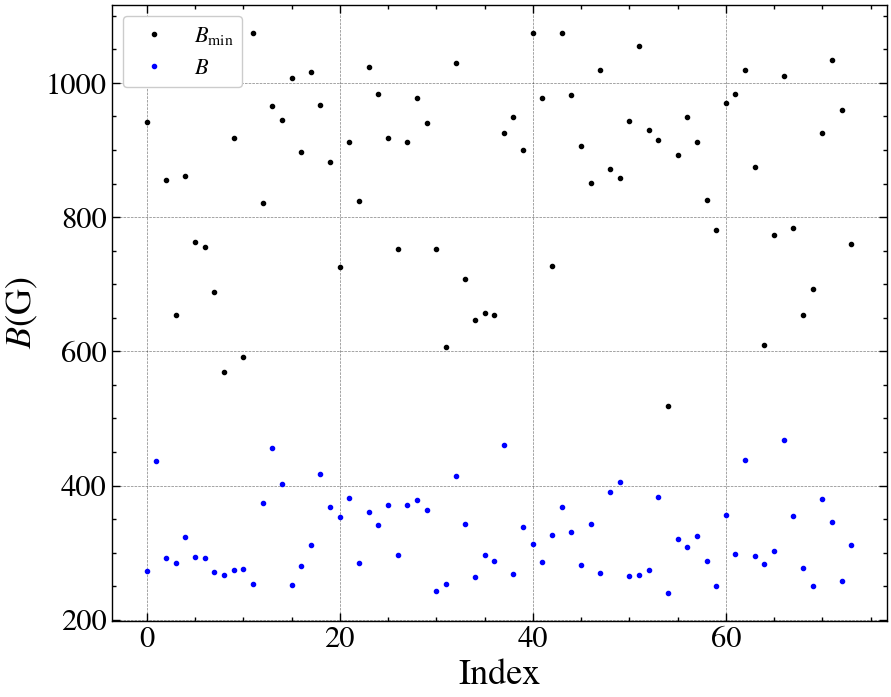

In [59]:
#find the stars that have a B field less than their minimum detectable
non_detec = data[data['B_min']>2*data['Beq']].copy()
non_detec = non_detec.reset_index(drop = True)
plt.plot(non_detec['B_min'],'.', color = 'k', label = r'$B_\mathrm{min}$')
plt.plot(non_detec['Beq'],'.', color = 'b', label = r'$B$')
plt.xlabel('Index')
plt.legend()
plt.ylabel(r'$B$(G)')

In [60]:
print('Ratio of non detectable B fields to all stars', len(non_detec)/len(data))

Ratio of non detectable B fields to all stars 0.019028027770635125


## Plot the HR Diagram now separating between detectable and non detectable

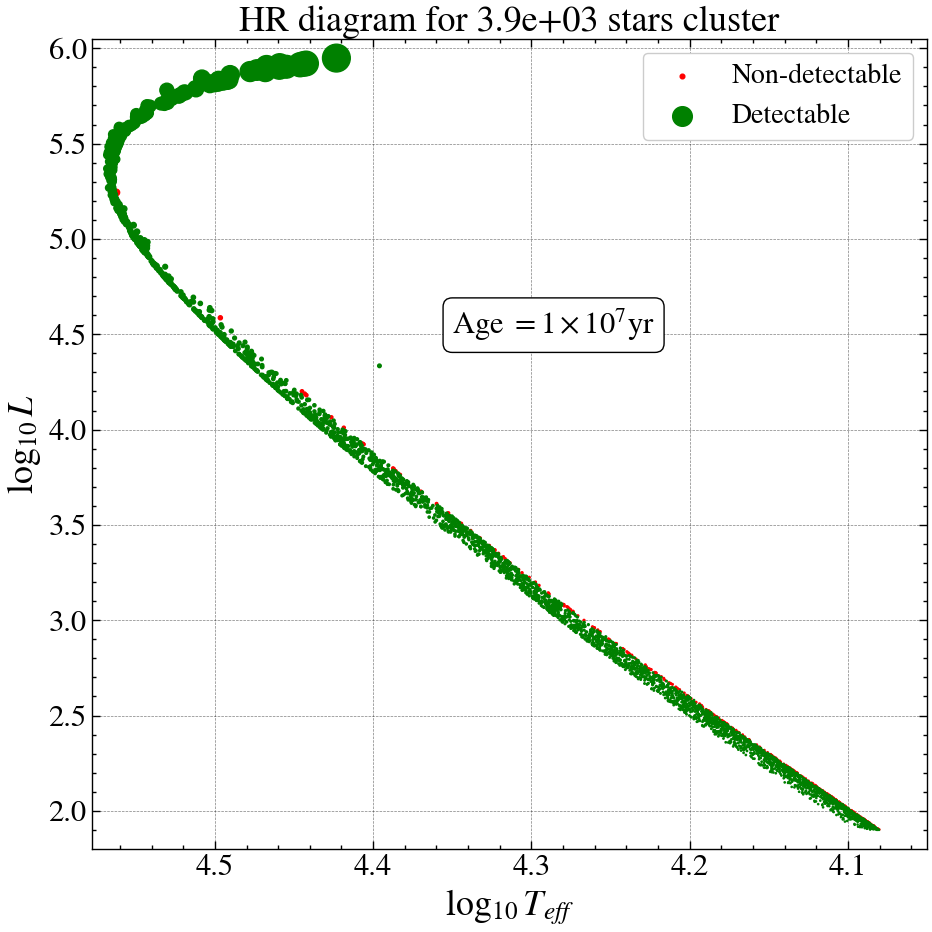

In [61]:
#plot the HR diagram
plt.figure(figsize=(10,10))
plt.scatter(data.loc[data['Beq']< data['B_min'], 'log_Teff'], data.loc[data['Beq']< data['B_min'], 'log_L'],\
           color = 'r', s= 0.2*(10**data.loc[data['Beq']< data['B_min'],'log_R'])**2, label = 'Non-detectable')
plt.scatter(data.loc[data['Beq']> data['B_min'], 'log_Teff'], data.loc[data['Beq']>data['B_min'], 'log_L'],\
           color = 'g', s= 0.2*(10**data.loc[data['Beq']> data['B_min'],'log_R'])**2, label = 'Detectable')
plt.ylim(np.min(data['log_L'])-0.1, np.nanmax(data['log_L'])+0.1,)
plt.xlim(np.nanmax(data['log_Teff'])+0.01, 4.05)
plt.xlabel(r'$\log_{10}{T_{eff}}$')
plt.ylabel(r'$\log_{10}{L}$')
plt.title('HR diagram for {:.1e} stars cluster'.format(n_stars))
plt.text(4.35, 4.5, r'Age $= 1\times10^7$yr', size=22, bbox =dict(boxstyle='round', facecolor = 'white'))
plt.legend(fontsize = 20)
plt.tight_layout()
#plt.savefig('figures/HRD_z14mix1_age1e7.pdf', format = 'pdf')

Only a small fraction of stars is observationally non-magentic in the assumption that all stars are magnetic